In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import datetime
import glob
from pathlib import Path
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

DOWNLOAD_DIR = 'C:\\Users\\P\\Documents\\GitHub\\entsoe-data'

This will import the data, you have to run it to be able to solve the homework.

In [2]:
def read_single_csv_entso_e(file):
    return pd.read_csv(file, sep='\t', encoding='utf-16', parse_dates=["DateTime"])


def load_complete_entso_e_data(directory):
    pattern = Path(directory) / '*.csv'
    files = glob.glob(str(pattern))

    if not files:
        raise ValueError(f"No files found when searching in {pattern}, wrong directory?")
    
    print(f'Concatenating {len(files)} csv files...')

    each_csv_file = [read_single_csv_entso_e(file) for file in files]
    data = pd.concat(each_csv_file, ignore_index=True)

    data = data.sort_values(by=["AreaName", "DateTime"])
    data = data.set_index("DateTime")

    print("Loading done.")

    return data


power_demand = load_complete_entso_e_data(DOWNLOAD_DIR)

Concatenating 68 csv files...
Loading done.


# Exercise 1 - Calculate the relation of Wednesday average consumption to Sunday average consumption for selected countries

In this exercise, calculate the relation of Wednesday average consumption to Sunday average consumption for the following countries: Austria, Germany, United Kingdom, Spain, Sweden, Italy, Croatia.

(1) First create a variable that contains only power consumption data for these countries. The pandas command ```isin()``` may be very helpful here. Reduce the data to only consider the period 2015-01-01 until 2019-12-31. The lecture slides may contain relevant code here.

(2) Then, group the data by weekday and country (i.e. AreaName). Use ```groupby``` and ```mean```for that purpose. 

(3) Calculate for all countries the proportion of Wednesday (day 2) and Sunday (day 6) by dividing the two values.

(4) For which country, this relative value is highest? What could this indicate?

In [3]:
power_demand

,Year,Month,Day,ResolutionCode,areacode,AreaTypeCode,AreaName,MapCode,TotalLoadValue,UpdateTime
DateTime,,,,,,,,,,
2014-12-31 23:00:00,2014,12,31,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,7412.14,2017-09-14 04:16:36
2014-12-31 23:15:00,2014,12,31,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,7305.11,2017-09-14 04:16:36
2014-12-31 23:30:00,2014,12,31,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,7263.03,2017-09-14 04:16:36
2014-12-31 23:45:00,2014,12,31,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,7103.58,2017-09-14 04:16:36
2015-01-01 00:00:00,2015,1,1,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,6958.62,2017-09-14 04:00:17
...,...,...,...,...,...,...,...,...,...,...
2020-05-12 14:00:00,2020,5,12,PT60M,10YCH-SWISSGRIDZ,CTA,swissgrid CA,CH,7460.58,2020-05-12 21:21:14
2020-05-12 15:00:00,2020,5,12,PT60M,10YCH-SWISSGRIDZ,CTA,swissgrid CA,CH,7457.44,2020-05-12 22:49:48
2020-05-12 16:00:00,2020,5,12,PT60M,10YCH-SWISSGRIDZ,CTA,swissgrid CA,CH,6417.68,2020-05-13 00:21:11


In [4]:
power_demand.columns

Index(['Year', 'Month', 'Day', 'ResolutionCode', 'areacode', 'AreaTypeCode',
       'AreaName', 'MapCode', 'TotalLoadValue', 'UpdateTime'],
      dtype='object')

In [5]:
power_demand["AreaName"].unique()

array(['50Hertz CA', 'APG BZ', 'APG CA', 'AST BZ', 'AST CA', 'Albania',
       'Amprion CA', 'Austria', 'Belgium', 'Bosnia Herzegovina',
       'Bulgaria', 'CEPS BZ', 'CEPS CA', 'CGES BZ', 'CGES CA', 'CREOS CA',
       'Croatia', 'Cyprus', 'Cyprus TSO BZ', 'Cyprus TSO CA',
       'Czech Republic', 'DE-AT-LU BZ', 'DE-LU BZ', 'DK1  BZ', 'DK2 BZ',
       'Denmark', 'ELES BZ', 'ELES CA', 'EMS BZ', 'EMS CA', 'ESO BZ',
       'ESO CA', 'EirGrid CA', 'Elering BZ', 'Elering CA', 'Elia BZ',
       'Elia CA', 'Energinet CA', 'Estonia', 'Fingrid BZ', 'Fingrid CA',
       'Finland', 'France', 'Germany', 'Greece', 'HOPS BZ', 'HOPS CA',
       'Hungary', 'IPTO BZ', 'IPTO CA', 'IT-Centre-North BZ',
       'IT-Centre-South BZ', 'IT-North BZ', 'IT-Sardinia BZ',
       'IT-Sicily BZ', 'IT-South BZ', 'Ireland', 'Ireland - (SEM) BZ',
       'Italy', 'Italy CA', 'Latvia', 'Litgrid BZ', 'Litgrid CA',
       'Lithuania', 'Luxembourg', 'MAVIR BZ', 'MAVIR CA', 'MD BZ',
       'MD CA', 'MEPSO BZ', 'MEPSO CA', '

In [6]:
relevant_countrys = ["Austria", "Germany", "United Kingdom", "Spain", "Sweden", "Italy", "Croatia"]

relevant_countrys

['Austria', 'Germany', 'United Kingdom', 'Spain', 'Sweden', 'Italy', 'Croatia']

In [7]:
power_demand_relevant_countrys = power_demand[power_demand["AreaName"].isin(relevant_countrys)]
power_demand_relevant_countrys

,Year,Month,Day,ResolutionCode,areacode,AreaTypeCode,AreaName,MapCode,TotalLoadValue,UpdateTime
DateTime,,,,,,,,,,
2014-12-01 23:00:00,2014,12,1,PT15M,10YAT-APG------L,CTY,Austria,AT,6493.6,2017-09-14 04:00:06
2014-12-01 23:15:00,2014,12,1,PT15M,10YAT-APG------L,CTY,Austria,AT,6350.4,2017-09-14 04:00:06
2014-12-01 23:30:00,2014,12,1,PT15M,10YAT-APG------L,CTY,Austria,AT,6494.0,2017-09-14 04:00:06
2014-12-01 23:45:00,2014,12,1,PT15M,10YAT-APG------L,CTY,Austria,AT,6463.2,2017-09-14 04:00:06
2014-12-02 00:00:00,2014,12,2,PT15M,10YAT-APG------L,CTY,Austria,AT,6423.2,2017-09-14 04:00:06
...,...,...,...,...,...,...,...,...,...,...
2020-05-11 22:30:00,2020,5,11,PT30M,GB,CTY,United Kingdom,GB,27496.0,2020-05-13 00:34:29
2020-05-11 23:00:00,2020,5,11,PT30M,GB,CTY,United Kingdom,GB,26155.0,2020-05-13 01:35:15
2020-05-11 23:30:00,2020,5,11,PT30M,GB,CTY,United Kingdom,GB,25325.0,2020-05-13 01:35:15


In [8]:
power_demand_relevant_countrys_time_period = power_demand_relevant_countrys["2015-01-01" : "2019-12-31"]
power_demand_relevant_countrys_time_period

,Year,Month,Day,ResolutionCode,areacode,AreaTypeCode,AreaName,MapCode,TotalLoadValue,UpdateTime
DateTime,,,,,,,,,,
2015-01-01 00:00:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,6017.2,2017-09-14 04:00:15
2015-01-01 00:15:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,5966.8,2017-09-14 04:00:15
2015-01-01 00:30:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,5935.6,2017-09-14 04:00:15
2015-01-01 00:45:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,5934.4,2017-09-14 04:00:15
2015-01-01 01:00:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,5750.8,2017-09-14 04:00:15
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 21:30:00,2019,12,31,PT30M,GB,CTY,United Kingdom,GB,34772.0,2020-01-06 22:16:17
2019-12-31 22:00:00,2019,12,31,PT30M,GB,CTY,United Kingdom,GB,32305.0,2020-01-06 22:16:17
2019-12-31 22:30:00,2019,12,31,PT30M,GB,CTY,United Kingdom,GB,31521.0,2020-01-06 22:16:17


In [9]:
power_demand_relevant_countrys_weekday_mean = power_demand_relevant_countrys_time_period.groupby([power_demand_relevant_countrys_time_period.index.weekday, power_demand_relevant_countrys_time_period.AreaName]).mean()
power_demand_relevant_countrys_weekday_mean

Year     Month        Day  TotalLoadValue
DateTime AreaName                                                        
0        Austria         2017.003831  6.521073  15.701149     7400.972206
         Croatia         2017.003831  6.521073  15.701149     2027.824553
         Germany         2017.003792  6.521293  15.701457    57899.311051
         Italy           2017.003831  6.521073  15.701149    34013.568646
         Spain           2017.004792  6.522524  15.699361    29367.402875
         Sweden          2017.003831  6.521073  15.701149    16149.643678
         United Kingdom  2016.920473  6.613992  15.684141    36977.463284
1        Austria         2017.007663  6.505747  15.770115     7542.120003
         Croatia         2017.007824  6.505668  15.769599     2062.263292
         Germany         2017.007623  6.505927  15.770226    59594.760724
         Italy           2017.007663  6.505747  15.770115    35546.978448
         Spain           2017.008148  6.505033  15.774085    30005.923790
         Sweden          2017.007345  6.505189  15.768003    16183.075842
         United Kingdom  2016.924974  6.608020  15.879789    37649.736703
2        Austria         2017.000000  6.515385  15.776923     7597.097115
         Croatia         2017.000000  6.515385  15.776923     2072.242308
         Germany         2017.000000  6.515385  15.776923    59894.796293
         Italy           2017.000000  6.515385  15.776923    35925.647596
         Spain           2017.000642  6.514194  15.777546    30108.756696
         Sweden          2017.000000  6.515385  15.776923    16188.529006
         United Kingdom  2016.914055  6.612156  15.884805    37681.473124
3        Austria         2016.992337  6.524904  15.785441     7531.484722
         Croatia         2016.992337  6.524904  15.785441     2070.504470
         Germany         2016.992257  6.525106  15.784625    59376.633233
         Italy           2016.992337  6.524904  15.785441    35810.509738
         Spain           2016.993610  6.527157  15.786581    29979.879712
         Sweden          2016.992337  6.524904  15.785441    16103.485951
         United Kingdom  2016.916083  6.561467  15.998973    37563.410436
4        Austria         2016.996169  6.517241  15.620690     7370.000862
         Croatia         2016.996169  6.517241  15.620690     2065.382344
         Germany         2016.996049  6.517323  15.620739    58201.758320
         Italy           2016.996169  6.517241  15.620690    35333.149106
         Spain           2017.001921  6.528658  15.656580    29655.860070
         Sweden          2016.996487  6.516366  15.621427    15740.090691
         United Kingdom  2016.907066  6.571081  15.755077    37102.554703
5        Austria         2016.996169  6.544061  15.800766     6448.911574
         Croatia         2016.996169  6.544061  15.800766     1926.927203
         Germany         2016.996169  6.544061  15.800766    49936.054741
         Italy           2016.996169  6.544061  15.800766    29623.509579
         Spain           2016.996169  6.544061  15.800766    26691.214719
         Sweden          2017.003846  6.523077  15.815385    14501.897917
         United Kingdom  2016.899164  6.587257  15.754910    34009.274222
6        Austria         2017.000000  6.536398  15.639847     5982.295785
         Croatia         2017.000000  6.536398  15.639847     1802.134738
         Germany         2016.999960  6.536619  15.640192    46127.261956
         Italy           2017.000000  6.536398  15.639847    26104.259419
         Spain           2017.000000  6.536398  15.639847    24857.647031
         Sweden          2017.007051  6.515705  15.647756    14489.429647
         United Kingdom  2016.906455  6.574310  15.559204    33251.563333

In [10]:
wednesday_sunday_means = power_demand_relevant_countrys_weekday_mean.loc[((2,6),),'TotalLoadValue']
wednesday_sunday_means

DateTime  AreaName      
2         Austria            7597.097115
          Croatia            2072.242308
          Germany           59894.796293
          Italy             35925.647596
          Spain             30108.756696
          Sweden            16188.529006
          United Kingdom    37681.473124
6         Austria            5982.295785
          Croatia            1802.134738
          Germany           46127.261956
          Italy             26104.259419
          Spain             24857.647031
          Sweden            14489.429647
          United Kingdom    33251.563333
Name: TotalLoadValue, dtype: float64

In [11]:
proportion_wednesday_sunday = ((power_demand_relevant_countrys_weekday_mean.loc[((2),),'TotalLoadValue']) / (power_demand_relevant_countrys_weekday_mean.loc[((6),),'TotalLoadValue']))
proportion_wednesday_sunday

AreaName
Austria           1.269930
Croatia           1.149882
Germany           1.298468
Italy             1.376237
Spain             1.211247
Sweden            1.117265
United Kingdom    1.133224
Name: TotalLoadValue, dtype: float64

In [12]:
highest_proportion = proportion_wednesday_sunday.idxmax(axis=0), proportion_wednesday_sunday.max(axis=0)
highest_proportion

('Italy', 1.3762369971752841)

# Exercise 2 - Calculate the monthly average consumption as deviation from mean consumption

For the same countries as in the above dataset, calculate the monthly mean consumption as deviation from the mean of consumption over the whole time. Plot the curves for all countries.

(1) First create a variable that contains only power consumption data for the selected countries. The pandas command ```isin()``` may be very helpful here. If you did Exercise 1, you can use the same dataset.

(2) Then, aggregate the data by country (i.e. AreaName) and month. Use ```groupby``` and ```mean``` for that purpose. Select the column ```TotalLoadValue``` from the result.

(3)  Aggregate the data by country (i..e AreaName) only, i.e. calculate the average consumption by country using ```groupby``` and ```mean```. Select the column ```TotalLoadValue``` from the result.

(4) Divide the result of (2) by (3) and observe how well broadcasting works here.

(5) Use the command ```unstack``` on the result. How does the table look now? Plot the result. If your resulting, unstacked dataframe is called ```result```, you may use ```result.plot()``` to get a nice plot.

(6) How would you explain the difference in the curve between Croatia and Sweden?


In [13]:
power_demand_relevant_countrys_monthly_mean = power_demand_relevant_countrys_time_period.groupby([power_demand_relevant_countrys_time_period.index.month, power_demand_relevant_countrys_time_period.AreaName]).mean()
power_demand_relevant_countrys_monthly_mean

Year  Month        Day  TotalLoadValue
DateTime AreaName                                                     
1        Austria         2017.000000    1.0  16.000000     7932.530645
         Croatia         2017.000000    1.0  16.000000     2169.616129
         Germany         2016.999798    1.0  16.000941    59465.218593
         Italy           2017.000000    1.0  16.000000    34078.574731
         Spain           2017.006472    1.0  16.038296    30520.369202
...                              ...    ...        ...             ...
12       Germany         2017.000000   12.0  16.000000    56849.113073
         Italy           2017.000000   12.0  16.000000    32592.034140
         Spain           2017.000000   12.0  16.000000    28642.714516
         Sweden          2017.026144   12.0  16.046296    18057.871460
         United Kingdom  2016.999832   12.0  15.994954    38694.120942

[84 rows x 4 columns]

In [65]:
power_demand_relevant_countrys_mean_total = power_demand_relevant_countrys.groupby([power_demand_relevant_countrys.AreaName]).mean()
power_demand_relevant_countrys_mean_total['TotalLoadValue']

AreaName
Austria            7117.496779
Croatia            1998.053066
Germany           55852.646350
Italy             32948.027273
Spain             28525.867365
Sweden            15723.579332
United Kingdom    36218.496332
Name: TotalLoadValue, dtype: float64

In [66]:
proportions_monthly_to_total = power_demand_relevant_countrys_monthly_mean['TotalLoadValue']/power_demand_relevant_countrys_mean_total['TotalLoadValue']
proportions_monthly_to_total

DateTime  AreaName      
1         Austria           1.114511
          Croatia           1.085865
          Germany           1.064680
          Italy             1.034313
          Spain             1.069919
                              ...   
12        Germany           1.017841
          Italy             0.989195
          Spain             1.004096
          Sweden            1.148458
          United Kingdom    1.068352
Name: TotalLoadValue, Length: 84, dtype: float64

In [18]:
result = proportions_monthly_to_total.unstack(level=0)
result

DateTime,1,2,3,4,5,6,7,8,9,10,11,12
AreaName,,,,,,,,,,,,
Austria,1.114511,1.129640,1.064255,0.954842,0.910961,0.926980,0.917108,0.906569,0.943375,0.988344,1.076616,1.086831
Croatia,1.085865,1.066994,1.004125,0.921479,0.907673,0.961241,1.067149,1.055318,0.960058,0.938632,0.994004,1.072492
Germany,1.064680,1.074637,1.036387,0.966228,0.949074,0.963325,0.965359,0.947466,0.965349,0.995855,1.060509,1.017841
Italy,1.034313,1.057775,0.997954,0.917381,0.940408,1.033745,1.144828,0.966806,1.020399,0.977909,1.011346,0.989195
Spain,1.069919,1.072097,1.006085,0.946106,0.939901,0.999904,1.067482,1.014388,0.988544,0.947276,1.006293,1.004096
Sweden,1.266700,1.232713,1.131901,0.989008,0.870079,0.815315,0.753013,0.797897,0.860343,0.968535,1.106465,1.148458
United Kingdom,1.136892,1.161240,1.097731,0.999288,0.950712,0.918102,0.912753,0.898621,0.921774,0.984012,1.085924,1.068352


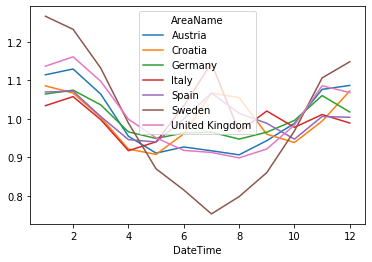

In [67]:
import matplotlib.pyplot as plt

result_0 = result.plot()
result_0

#pro Aschnitt auf der Längsachse ist ein anderer Staat mit seinen 12 Monaten

In [59]:
result_1 = proportions_monthly_to_total.unstack(level= -1)
result_1

AreaName,Austria,Croatia,Germany,Italy,Spain,Sweden,United Kingdom
DateTime,,,,,,,
1,1.114511,1.085865,1.064680,1.034313,1.069919,1.266700,1.136892
2,1.129640,1.066994,1.074637,1.057775,1.072097,1.232713,1.161240
3,1.064255,1.004125,1.036387,0.997954,1.006085,1.131901,1.097731
4,0.954842,0.921479,0.966228,0.917381,0.946106,0.989008,0.999288
5,0.910961,0.907673,0.949074,0.940408,0.939901,0.870079,0.950712
6,0.926980,0.961241,0.963325,1.033745,0.999904,0.815315,0.918102
7,0.917108,1.067149,0.965359,1.144828,1.067482,0.753013,0.912753
8,0.906569,1.055318,0.947466,0.966806,1.014388,0.797897,0.898621
9,0.943375,0.960058,0.965349,1.020399,0.988544,0.860343,0.921774


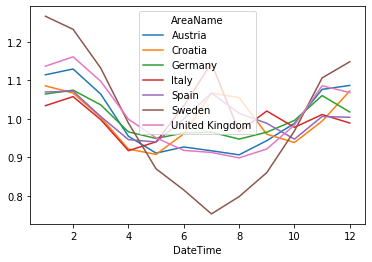

In [62]:
result_1.plot()

#jede Linie auf der Längsachse repräsentiert einen Staat über das Jahr hinweg

# Exercise 3 - calculate the hourly average consumption as deviation from mean consumption

Do the same as in exercise 2, but now for the hourly average consumption. I.e. how much is consumed on each of the 24 hours of a day?

Which country has the lowest, which the highest variability? What may be the reason for it?

In [71]:
power_demand_relevant_countrys_hourly_mean = power_demand_relevant_countrys_time_period.groupby([power_demand_relevant_countrys_time_period.index.hour, power_demand_relevant_countrys_time_period.AreaName]).mean()
power_demand_relevant_countrys_hourly_mean

Year     Month        Day  TotalLoadValue
DateTime AreaName                                                        
0        Austria         2016.999452  6.523549  15.727820     5655.575192
         Croatia         2016.999452  6.523549  15.727820     1500.185104
         Germany         2016.999452  6.523549  15.727820    44154.977134
         Italy           2016.999452  6.523549  15.727820    24837.571194
         Spain           2016.999452  6.523549  15.727820    23931.919496
...                              ...       ...        ...             ...
23       Germany         2016.999452  6.523549  15.727820    45549.716058
         Italy           2016.999452  6.523549  15.727820    26147.164841
         Spain           2016.999452  6.523549  15.727820    25330.783680
         Sweden          2017.000549  6.515634  15.725178    13504.059243
         United Kingdom  2016.908209  6.580155  15.769877    29568.920814

[168 rows x 4 columns]

In [72]:
power_demand_relevant_countrys_mean_total = power_demand_relevant_countrys.groupby([power_demand_relevant_countrys.AreaName]).mean()
power_demand_relevant_countrys_mean_total['TotalLoadValue']

AreaName
Austria            7117.496779
Croatia            1998.053066
Germany           55852.646350
Italy             32948.027273
Spain             28525.867365
Sweden            15723.579332
United Kingdom    36218.496332
Name: TotalLoadValue, dtype: float64

In [73]:
proportions_hourly_to_total = power_demand_relevant_countrys_hourly_mean['TotalLoadValue']/power_demand_relevant_countrys_mean_total['TotalLoadValue']
proportions_monthly_to_total

DateTime  AreaName      
1         Austria           1.114511
          Croatia           1.085865
          Germany           1.064680
          Italy             1.034313
          Spain             1.069919
                              ...   
12        Germany           1.017841
          Italy             0.989195
          Spain             1.004096
          Sweden            1.148458
          United Kingdom    1.068352
Name: TotalLoadValue, Length: 84, dtype: float64

In [77]:
results_hourly_1 = proportions_hourly_to_total.unstack(level= -1)
results_hourly_1

AreaName,Austria,Croatia,Germany,Italy,Spain,Sweden,United Kingdom
DateTime,,,,,,,
0,0.794602,0.750823,0.790562,0.753841,0.838955,0.848676,0.776906
1,0.776085,0.727726,0.784503,0.734200,0.810559,0.844563,0.752902
2,0.775388,0.726327,0.794923,0.730967,0.797617,0.845369,0.724375
3,0.818459,0.745998,0.827530,0.747927,0.799452,0.863374,0.708356
4,0.913966,0.831994,0.903030,0.812397,0.833556,0.922077,0.712445
5,1.020782,0.956159,0.992157,0.933265,0.900282,1.003588,0.793981
6,1.095316,1.040387,1.061698,1.058014,0.980444,1.057679,0.932351
7,1.122289,1.094245,1.097899,1.133792,1.044550,1.075059,1.046305
8,1.137121,1.113816,1.123202,1.159373,1.089440,1.083603,1.103590


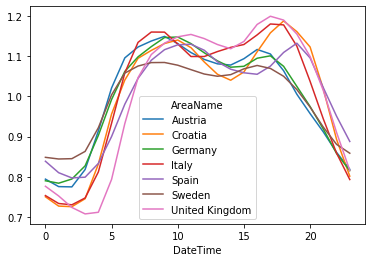

In [79]:
results_hourly_1.plot()

In [ ]:
# Sweden has the lowest variability, the United Kingdom the highest.
# Maybe in reality the hourly consumption in Sweden has the highest variability, but levels itself to highly mean, over the whole year.

In [ ]:
# Bonusaufgabe: Powerdemand in Schweden mehr differenzieren

# Exercise 4 - Calculate the average load per capita

Below you find a table with population data for our selected countries. You should use it to calculate per capita consumption.

(1) Calculate the average load in all countries using ```groupby``` and ```mean``` and select the column ```TotalLoadValue``` from the result.

(2) Divide the result by the ```Population``` column of the dataframe ```population```. Observe, how broadcasting helps here nicely.

(3) Plot the result. Which country has the highest load, which the lowest? What may be the reason? In which unit is this value? How could we convert it to MWh per year?

In [80]:
population = pd.DataFrame({'Country': ["Austria", "Croatia", "Germany", "Italy", "Spain", "Sweden", "United Kingdom"],
             'Population': [8840521, 4087843, 82905782, 60421760, 46796540, 10175214, 66460344]})

population.index = population["Country"]

population

,Country,Population
Country,,
Austria,Austria,8840521
Croatia,Croatia,4087843
Germany,Germany,82905782
Italy,Italy,60421760
Spain,Spain,46796540
Sweden,Sweden,10175214
United Kingdom,United Kingdom,66460344


In [86]:
fuck = power_demand_relevant_countrys_mean_total ["TotalLoadValue"] / population["Population"]
fuck

AreaName
Austria           0.000805
Croatia           0.000489
Germany           0.000674
Italy             0.000545
Spain             0.000610
Sweden            0.001545
United Kingdom    0.000545
dtype: float64

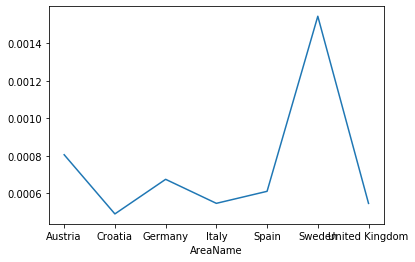

In [88]:
fuck.plot()